In [1]:
from qiskit.circuit.library import MCXGate
from qiskit import QuantumCircuit, execute, Aer, transpile
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

def shift_qc(qc,n):
    sh=[]
    for i in range(n-1):
        sh.append(MCXGate(i+1))

    # - operation
    qc.h(n-1)
    qc.x(n-1)
    for i in range (n-1):
        qubit_list=[n-1]
        for j in range(i+1):
            qubit_list.append(n-j-2)
        qc.append(sh[i],qubit_list)
    qc.x(n-1)
    
    for i in range (n-1):
        qubit_list=[n-1]
        for j in range(i+1):
            qubit_list.append(n-j-2)
        qc.append(sh[i],qubit_list)
        if qubit_list[-1]!=0:
            qc.x(qubit_list[-1])
    for i in range(1,n-1):
        qc.x(i)

    return 0

#############################

import numpy as np

def make_qcs(steps,n):
    qc = QuantumCircuit(n,n-1)

    qc.x(n-1)
    qc.h(n-1)
    qc.p(np.pi/2, n-1)

    for i in range(steps):
        shift_qc(qc,n)

    qc.measure(range(n-1), range(n-1))
    return qc
#############################

def run(qc):
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(qc, simulator, shots=5000)
    result = job.result()

    counts = result.get_counts(qc)
    return counts
    #############################

def reverse_binary(bin_string):
    # Reverse the string and return it
    bin_string = bin_string[:-1]
    return bin_string[::-1]

def get_modified(counts):
    # Dictionary comprehension to create a new dictionary with the reversed keys
    reversed_counts = {reverse_binary(k): v for k, v in counts.items()}
    decimal_numbers = {}

    for binary, count in reversed_counts.items():
        decimal = int(binary, 2)
        decimal_numbers[decimal] = count


    # Subtract 1024 from keys larger than 512
    modified_data = {k - 1024 if k > 512 else k: v for k, v in decimal_numbers.items()}
    return modified_data

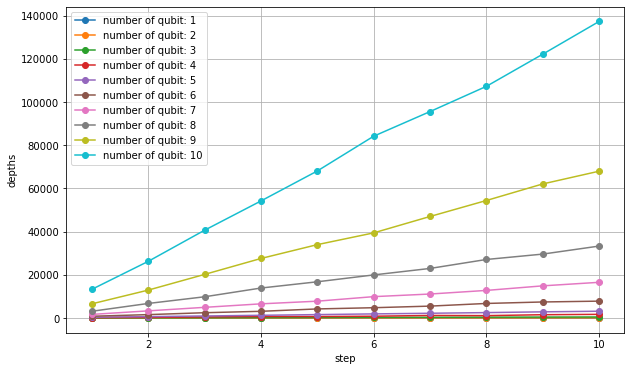

In [135]:
from qiskit_ibm_provider import IBMProvider

# Save your credentials on disk.
IBMProvider.save_account(token='f05417217738a0abb8196f13143b11e46e37fe2e0d02785a2155bcfabb77f310ec99ced832117ebbdc4d228220b1819bc32a32a5cfa15d37cefb7644f769336a', overwrite=True)

provider = IBMProvider(instance='q-info-hackathon/team-22/main')
backend = provider.get_backend('ibm_canberra')

import numpy as np
import matplotlib.pyplot as plt
qc_depth=np.zeros((10,10)) #step, cubit size
for i in range (0,10):
    for j in range(0,10):
        qc_depth[i,j]=transpile(make_qcs(i+1,j+1),backend).depth()
size=np.array([1,2,3,4,5,6,7,8,9,10])

plt.figure(figsize=(10,6))
for i in range(0,10):
    plt.plot(size,qc_depth[:,i],marker='o', label='number of qubit: '+str(i+1))

plt.xlabel('step')
plt.ylabel('depths')
plt.legend()
plt.grid()
plt.show()

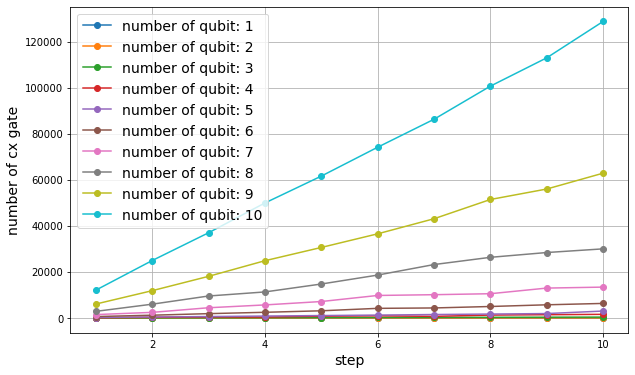

In [145]:
qc_gate=np.zeros((10,10)) #step, cubit size
for i in range (0,10):
    for j in range(0,10):
        qc_gate[i,j]=dict(transpile(make_qcs(i+1,j+1),backend).count_ops()).get('cx',0)

size=np.array([1,2,3,4,5,6,7,8,9,10])

plt.figure(figsize=(10,6))
for i in range(0,10):
    plt.plot(size,qc_gate[:,i],marker='o', label='number of qubit: '+str(i+1))

plt.xlabel('step', fontsize=14)
plt.ylabel('number of cx gate', fontsize=14)
plt.legend( fontsize=14)
plt.grid()
plt.show()